## EDA ##

Aquí hará las siguientes mierdas:
- lectura de datos
- identificación de características categóricas
- verificación de datos NaN
- detección de ruido
- normalización de datos
- análisis de correlaración de las características y sus respectivas visualizaciones

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\liuji\\Desktop\\covtype.csv")
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
print("Dataset (numéro de muestras y características): "+ str(df.shape))


Primero identificamos si hay datos categórico, para ver si están en one hot-coded.


In [ ]:
df.describe().T #columns with value's rango between 1 and 0 are categorical. Soil_Type y Wilderness_Area are categoric dates:  1 2 3 4 ... --> one hot coded :)


In [ ]:
df.info


In [ ]:
# Verificar si hay valores NaN en el DataFrame
if df.isnull().values.any():
    print("Hay valores NaN en el DataFrame.")
    # Opcional: Mostrar el número total de valores NaN por columna
    print("Valores NaN por columna:")
    print(df.isnull().sum())
else:
    print("No hay valores NaN en el DataFrame.")


Ahora miramos si hay ruidos: valores inesperados en las columnas categorícas...





Ahora vamos a escalar los valores, y primeros creamos un dataframe sin columnas categóricas, que son 11 columnas, que incluye a 10 características y una columna de objetivo.


In [3]:
# Identify columns with only categorical values (0 and 1)
categorical_columns = [col for col in df.columns if sorted(df[col].unique()) == [0, 1]]

# Drop those columns from the dataframe to create the auxiliary dataframe
aux_df = df.drop(columns=categorical_columns)

# Display the resulting dataframe
aux_df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


Ahora vamos a normalizar los valores de las primeras 10 columnas. La fórmula es


$$
z = \frac{x - \mu}{\sigma}
$$

Donde:
- \(x\): es el valor original.
- \(\mu\): es la media de la columna.
- \(\sigma\): es la desviación estándar de la columna.


In [6]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Seleccionar las primeras 10 columnas para estandarizar
numerical_columns = aux_df.columns[:10]

# Ajustar y transformar las primeras 10 columnas
aux_df_standardized = aux_df.copy()  # Crear una copia del dataframe original
aux_df_standardized[numerical_columns] = scaler.fit_transform(aux_df[numerical_columns])

# Mostrar las primeras filas del dataframe estandarizado
print(aux_df_standardized.head())

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  -1.297805 -0.935157 -1.482820                         -0.053767   
1  -1.319235 -0.890480 -1.616363                         -0.270188   
2  -0.554907 -0.148836 -0.681563                         -0.006719   
3  -0.622768 -0.005869  0.520322                         -0.129044   
4  -1.301377 -0.988770 -1.616363                         -0.547771   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.796273                        -1.180146   
1                       -0.899197                        -1.257106   
2                        0.318742                         0.532212   
3                        1.227908                         0.474492   
4                       -0.813427                        -1.256464   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.330743        0.439143       0.142960   
1       0.293388        0.590899       0.221342   
2    

In [ ]:
Ahora, después de comprobar que los datos están limpios para ser procesados, vamos a analizar.
El primer paso sería estudiar las relaciones que hay entre los atributos, excluyendo aquellos categóricos.

In [8]:
!pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/294.9 kB 416.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 655.8 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas (excluir las categóricas)
numerical_columns = aux_df.select_dtypes(include=['float64', 'int64']).columns
# También puedes excluir manualmente columnas categóricas si están en un rango específico:
# numerical_columns = aux_df.columns[:10]  # Por ejemplo, si solo las primeras 10 son numéricas

# Calcular la matriz de correlación
correlation_matrix = aux_df[numerical_columns].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                                    Elevation    Aspect     Slope  \
Elevation                            1.000000  0.015735 -0.242697   
Aspect                               0.015735  1.000000  0.078728   
Slope                               -0.242697  0.078728  1.000000   
Horizontal_Distance_To_Hydrology     0.306229  0.017376 -0.010607   
Vertical_Distance_To_Hydrology       0.093306  0.070305  0.274976   
Horizontal_Distance_To_Roadways      0.365559  0.025121 -0.215914   
Hillshade_9am                        0.112179 -0.579273 -0.327199   
Hillshade_Noon                       0.205887  0.336103 -0.526911   
Hillshade_3pm                        0.059148  0.646944 -0.175854   
Horizontal_Distance_To_Fire_Points   0.148022 -0.109172 -0.185662   
Cover_Type                          -0.269554  0.017080  0.148285   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.306229   
Aspect                     

En la matriz de Heat, cuando más intenso es es el color, más profunda (1 o -1)es la correlación.


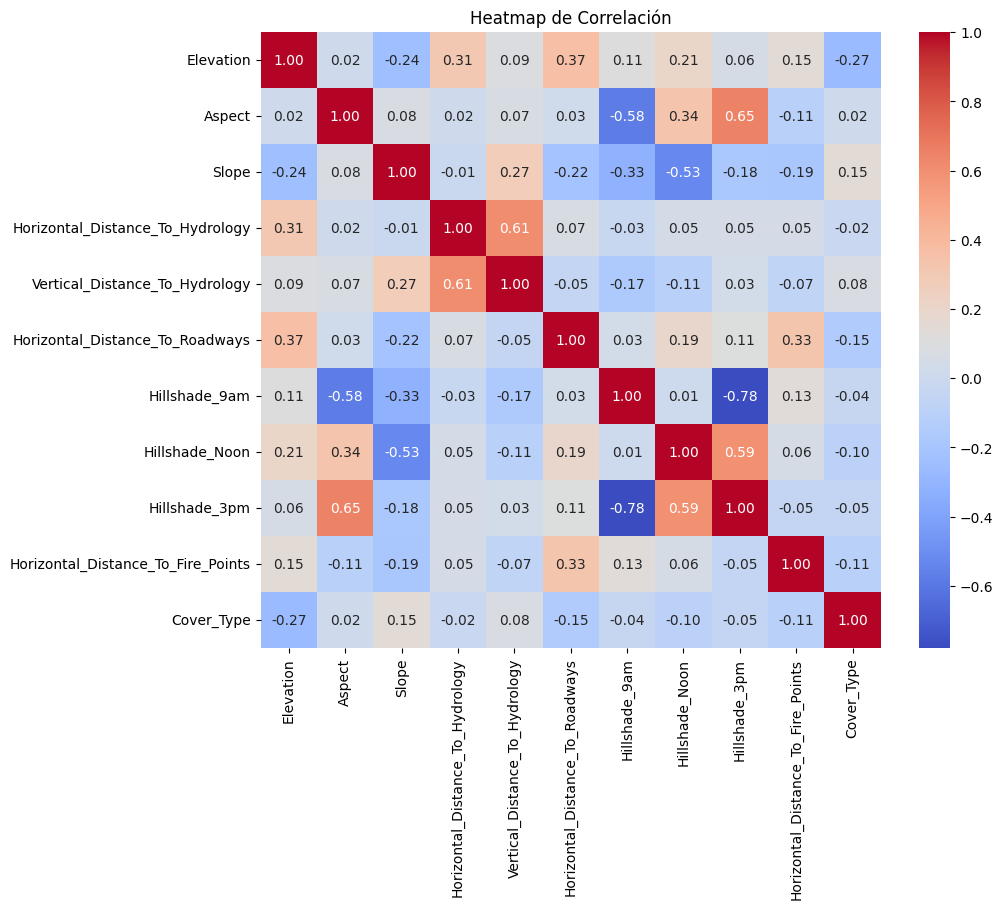

In [11]:
# Configurar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de Correlación")
plt.show()


In [14]:
import matplotlib.pyplot as plt
import numpy



#sets the number of features considered
size = 10

#create a dataframe with only 'size' features
data=aux_df_standardized.iloc[:,:size]

#get the names of all the columns
cols=data.columns

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


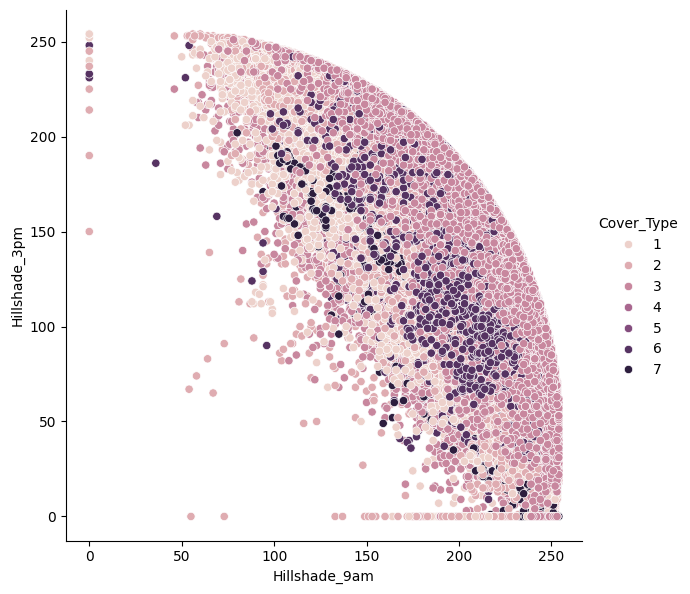

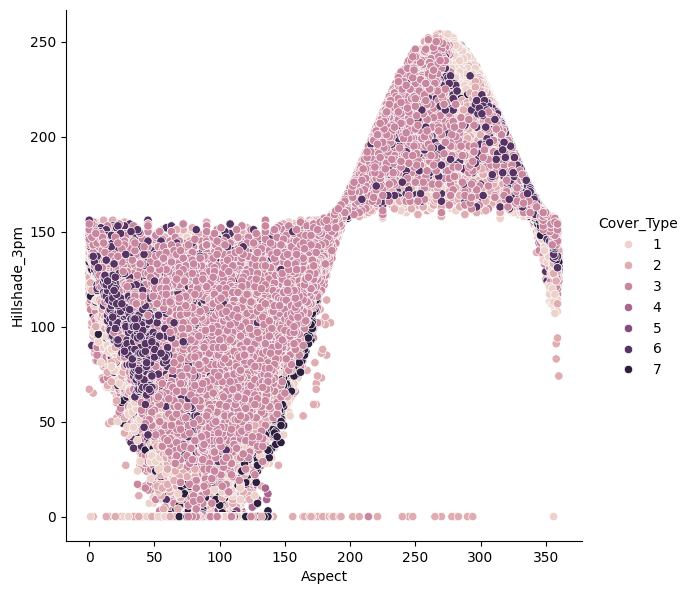

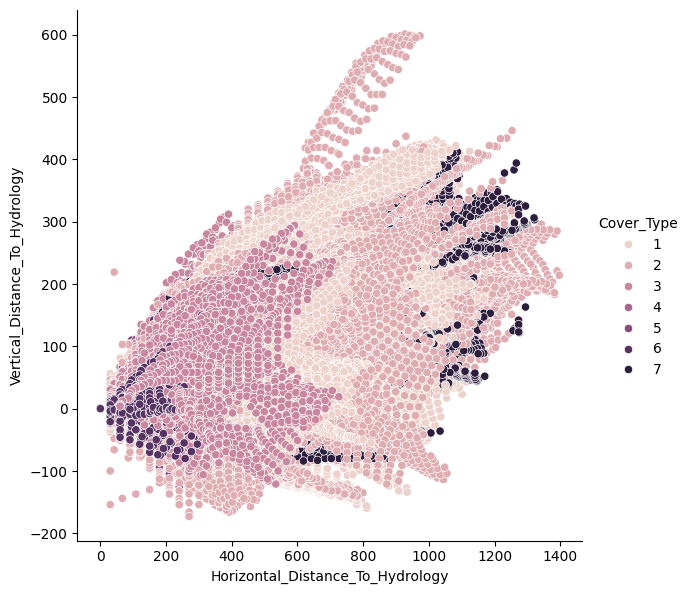

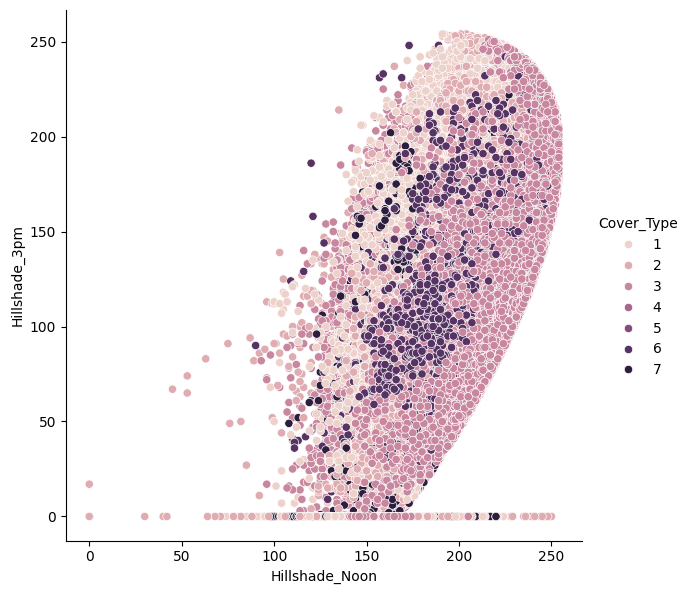

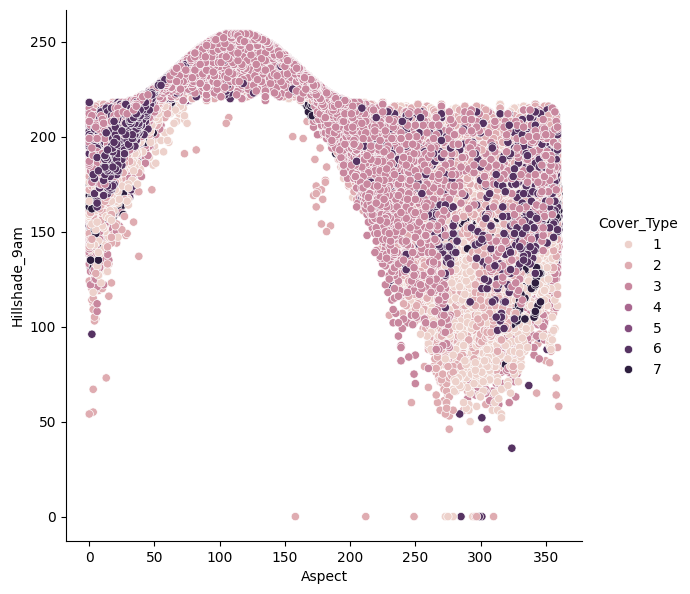

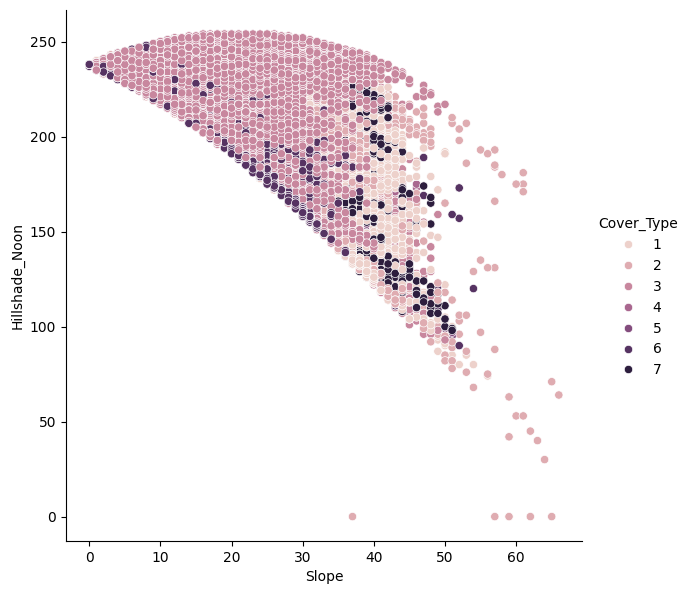

In [15]:
for v,i,j in s_corr_list:
    sns.pairplot(df, hue="Cover_Type", height=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()